Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [3]:
# uncomment the code below and execute this cell
library('tidyverse')

If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [4]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel~
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse~
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, ~
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, ~
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186~
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, ~
$ sex               <fct> male, female, female, NA, female, male, female, male~
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007~


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

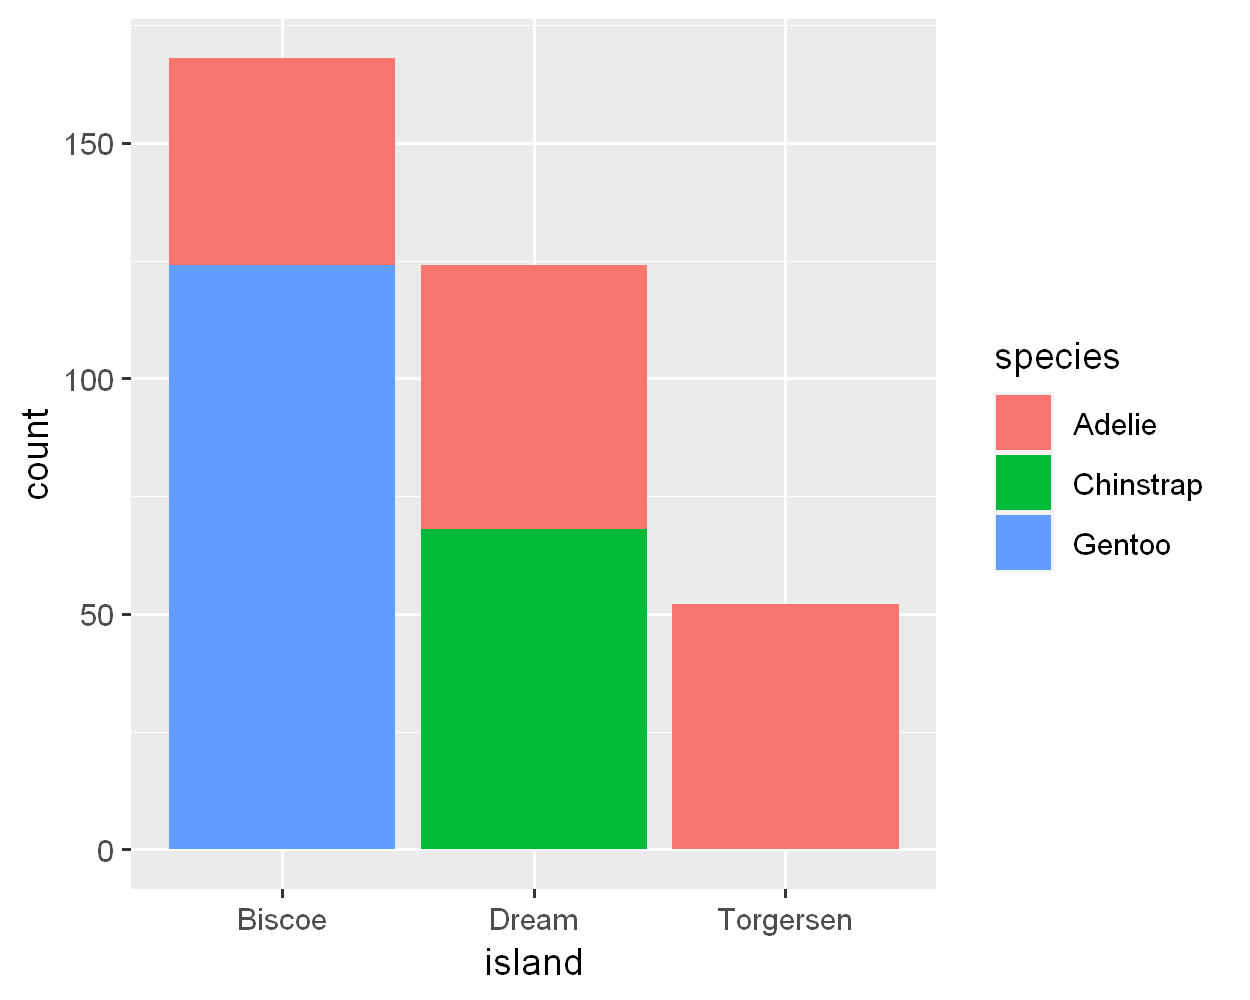

In [5]:
ggplot(data = penguins, mapping= aes(x= island, fill= species)) +
geom_bar()

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Biscoe, Dream, and Torgersen

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

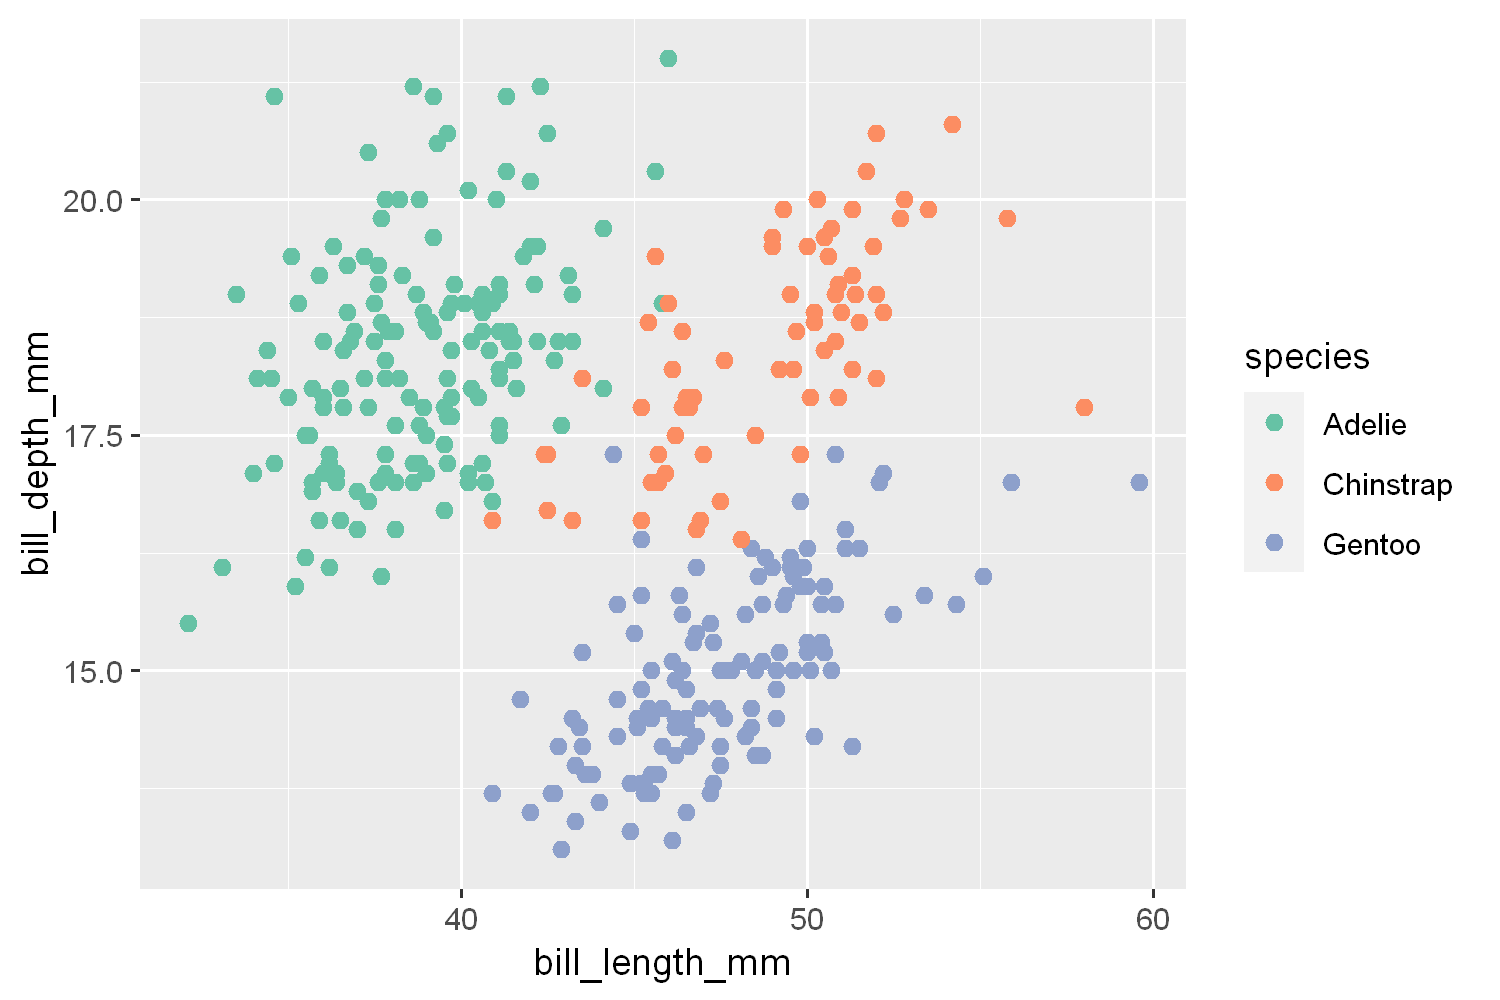

In [6]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
geom_point(na.rm = TRUE, size =2) + scale_color_brewer(palette = 'Set2')

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

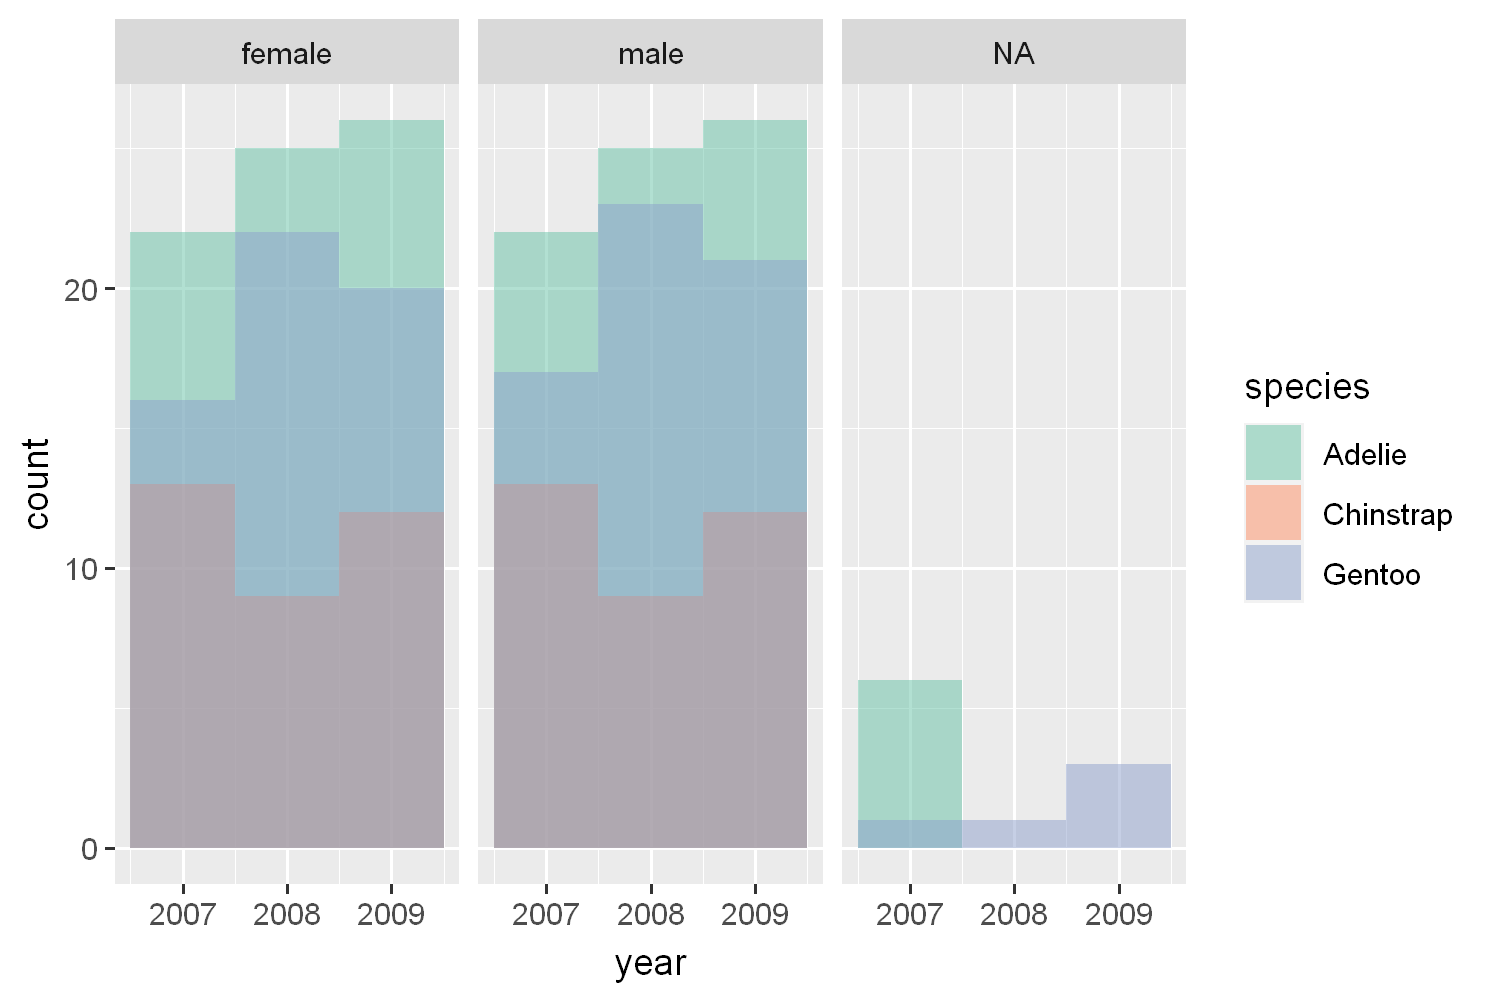

In [7]:
ggplot(data = penguins, mapping = aes(x = year, fill = species)) + geom_histogram(binwidth = 1, position = 'identity', alpha = 0.5) +
facet_wrap(~sex) + scale_fill_brewer(palette = 'Set2')

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

The data gets aggregated and stacked instead of overlapping so that they can be compared.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [8]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil~
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, ~
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, ~
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, ~
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263~
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450~
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, ~
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, ~
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, ~


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [9]:
txhousing <- txhousing |> select(-inventory)
txhousing |> head()

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene,2000,1,72,5380000,71400,701,2000.000
Abilene,2000,2,98,6505000,58700,746,2000.083
Abilene,2000,3,130,9285000,58100,784,2000.167
Abilene,2000,4,98,9730000,68600,785,2000.250
Abilene,2000,5,141,10590000,67300,794,2000.333
Abilene,2000,6,156,13910000,66900,780,2000.417


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [10]:
dallas_sub <- txhousing |> filter(city == 'Dallas', year == (2012:2013))
dallas_sub |> head()

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,2,3085,634067291,157100,17173,2012.083
Dallas,2012,4,4291,983333297,168700,17632,2012.250
Dallas,2012,6,5196,1209024869,177900,17587,2012.417
Dallas,2012,8,5264,1168296112,174200,16611,2012.583
Dallas,2012,10,4214,885330428,166700,15008,2012.750
Dallas,2012,12,3849,886692144,177800,12436,2012.917


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [11]:
dallas_sub <- mutate(dallas_sub, prct_sold = (sales/listings*100))

Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [12]:
dallas_summary <- dallas_sub %>%
group_by(month) %>%
summarize(mean_prct_sold = mean(prct_sold))

Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [13]:
dallas_summary |> slice_max(mean_prct_sold, n=3)

month,mean_prct_sold
<int>,<dbl>
5,48.17364
7,46.19657
3,41.15438


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [14]:
txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") %>%
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


the dataframe txhousing is being passed to the filter method/function which is reducing it down to the years 2012 and 2013 as well as the city Dallas
That reduced DF is then passed to the mutate function whic is going to create a new column that calculates the percent sold. That data set is then grouped by month. That 
is passed to the summarize function/method and calculates a new column which is the average percent sold per month. Slice Max is then taking the top 3 of those results.

In [15]:
result <- txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") %>%
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

In [16]:
#because it was just being wasted not being stored into a variable
result |> head()

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150
